In [1]:
import numpy as np
import pyfits
import math
from math import log10
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic_2d
from matplotlib import rc
import pickle
import os
import seaborn as sns

#Steps: Starting: (145155)
#Make a volume limited sample; (-18.5> mr > -24.5); (95738, 95638)
#Remove weird Galex fluxes;(77547,)(76769,)
#Remove weird Optical fluxes; (76765,)(76763,)(76752,)(76737,)(76710)
#Remove weird WISE fluxes; 76693, 76683, 76645, 76607
#(N-r) cut: 7.5>N-r; (75536)   N-r>=0; (75533)
#[W1]-[W3] cut: (-3.0,3.0); (75505, 75476)


os.chdir('/Users/nitya/Work/Data/Project1')
fi = pyfits.open("nsa_wise_v0_2_1.fits")
dat = fi[1].data
d = np.asarray(dat)
#-----------------------------------------------------------------------------------
#defining the volume limited sample
#r-band magnitudes
mr = d['ABSMAG'][:,4]
indr1 = np.where(mr<=-18.5)[0]
d = d[indr1]
mr = d['ABSMAG'][:,4]
indr2 = np.where(mr>=-24.5)[0]
d = d[indr2]



#make an environment defining population file
#Things in the file: 0. NSAID; 1. z; 2. RA; 3. Dec;
stuff = np.column_stack((d['NSAID'],d['Z'],d['RA'],d['DEC']))
#filename = 'edp'
#f = open(filename,'w')
#for line in stuff:
#    f.write("  ".join(str(x) for x in line) + "\n")
#f.close()


#------------------------------------------------------------------------------------
#removing bad galex stuff; then optical;
flux = d['NMGY']
fuv = flux[:,0]
ind1 = np.where(fuv>0)[0]
d = d[ind1]
ind2 = np.where(d['NMGY'][:,1]>0)[0]
d = d[ind2]
ind3 = np.where(d['NMGY'][:,2]>0)[0]
d = d[ind3]
ind4 = np.where(d['NMGY'][:,3]>0)[0]
d = d[ind4]
ind5 = np.where(d['NMGY'][:,4]>0)[0]
d = d[ind5]
ind6 = np.where(d['NMGY'][:,5]>0)[0]
d = d[ind6]
ind7 = np.where(d['NMGY'][:,6]>0)[0]
d = d[ind7]

#WISE fluxes; Replacing zero fluxes with forced and then filtering out the non-zero fluxes

#W1
w1 = np.asarray(d['W1_NMGY'])
w1f = np.asarray(d['W1_FORCED_NMGY'])
indw1 = np.where(w1==0)[0]
lug = np.arange(len(w1))
indz = lug[indw1]
np.put(w1,indz,w1f[indw1])
indw11 = np.where(w1>0)[0]
d = d[indw11]
w1 = w1[indw11]
d['W1_NMGY'] = w1
#W2
w2 = np.asarray(d['W2_NMGY'])
w2f = np.asarray(d['W2_FORCED_NMGY'])
indw2 = np.where(w2==0)[0]
lug2 = np.arange(len(w2))
indz2 = lug2[indw2]
np.put(w2,indz2,w2f[indw2])
indw22 = np.where(w2>0)[0]
d = d[indw22]
w2 = w2[indw22]
d['W2_NMGY'] = w2
#W3
w3 = np.asarray(d['W3_NMGY'])
w3f = np.asarray(d['W3_FORCED_NMGY'])
indw3 = np.where(w3==0)[0]
lug3 = np.arange(len(w3))
indz3 = lug3[indw3]
np.put(w3,indz3,w3f[indw3])
indw33 = np.where(w3>0)[0]
d = d[indw33]
w3 = w3[indw33]
d['W3_NMGY'] = w3
#W4
w4 = np.asarray(d['W4_NMGY'])
w4f = np.asarray(d['W4_FORCED_NMGY'])
indw4 = np.where(w4==0)[0]
lug4 = np.arange(len(w4))
indz4 = lug4[indw4]
np.put(w4,indz4,w4f[indw4])
indw44 = np.where(w4>0)[0]
d = d[indw44]
w4 = w4[indw44]
d['W4_NMGY'] = w4


#------------------------------------------------------------------------------------



In [2]:
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'], 'size': 15})
rc('text', usetex=True)      

SMALL_SIZE = 10
MEDIUM_SIZE = 13
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE) 
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


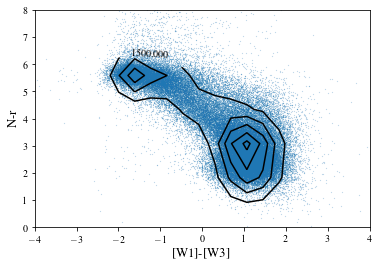

In [3]:
#Restricting Optical colors to 0<= N-r <= 7.5
opt = np.asarray([d['ABSMAG'][:,1][i] - d['ABSMAG'][:,4][i] for i in range(len(d['NSAID']))])
inf = np.asarray([d['W1MAG'][i] - d['W3MAG'][i] for i in range(len(d['NSAID']))])


h = binned_statistic_2d(inf,opt,inf,statistic = 'count',bins = (25,25))
xbins = [0.5*(h[1][i] + h[1][i+1]) for i in range(25)]
ybins = [0.5*(h[2][i] + h[2][i+1]) for i in range(25)]
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]

number = np.ma.array(h[0], mask = h[0] == 0)
number = np.log10(number)



plt.scatter(inf,opt, s = 0.01)
cs1 = plt.contour(xbins,ybins,np.transpose(h[0]),5, colors = 'k')
plt.clabel(cs1)
plt.ylim(0,8.0)
plt.xlim(-4.0,4.0)
plt.xlabel('[W1]-[W3]')
plt.ylabel('N-r')
plt.show()
